In [235]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'signal, arb.units')

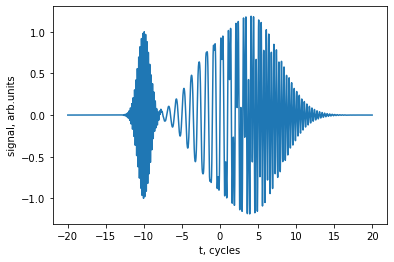

In [236]:
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 3**9)
y0=np.sin(t)*exp(-t**2/2/20**2)
y0=y0+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y0=y0+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y0)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

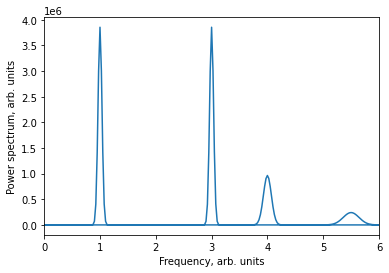

In [237]:
# Fourier spectrum
sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

Text(0, 0.5, 'signal, arb.units')

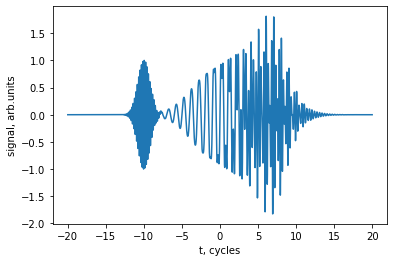

In [238]:
t=np.linspace(-20*2*pi, 20*2*pi, 3**9)

y = np.sin(t)*exp(-t**2/2/20**2)
y = y + np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y = y + np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
frequency = 4
time_shift = 7
y = y + np.sin(frequency*t)*exp(-(t-time_shift*2*pi)**2/2/10**2) 

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

The effect on the plot of the FFT spectrum is additional peak at frequency equal to 4. 


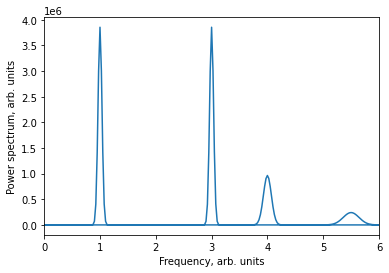

In [239]:
# Fourier spectrum
sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')
print("The effect on the plot of the FFT spectrum is additional peak at frequency equal to 4. ")

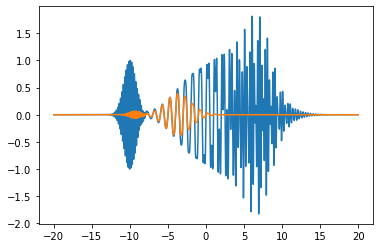

In [240]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=-5.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [241]:
def get_specgram(y, nwindowsteps=1000):
    t=np.linspace(-20*2*pi, 20*2*pi, 3**9)
    window_width=2*2*pi
    nt = (t[-1] - t[0]) / nwindowsteps
    specgram = list()      
    for i in range(nwindowsteps):
        window_position= t[0] + i * nt
        window_function=exp(-(t-window_position)**2/2/window_width**2)
        y_window = y * window_function
        f = np.abs(np.fft.fft(y_window)[: len(y) // 2]) ** 2
        specgram.append(f[::-1])
    w=np.fft.fftfreq(len(y_window), d=(t[1]-t[0])/2/pi)[: len(y) // 2]
    
    return np.array(specgram).T, w

In [242]:
def spectogram_image(y, edges=None):
    specgram, freq = get_specgram(y, nwindowsteps=1000)
    t=np.linspace(-20*2*pi, 20*2*pi, 3**9)
    plt.imshow(np.log(specgram + 1), aspect='auto', extent=[t[0] / 2 / pi, t[-1] / 2 / pi, min(freq), max(freq)])
    colorbar()
    if edges is not None:
        plt.ylim(*edges)
    
    plt.xlabel("Time, cycles")
    plt.ylabel("Frequency")
    plt.show()

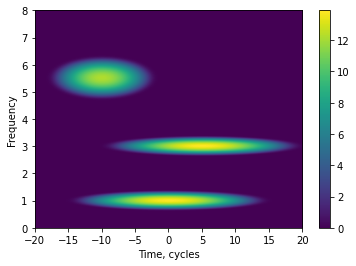

In [243]:
spectogram_image(y0, edges=(0, 8))

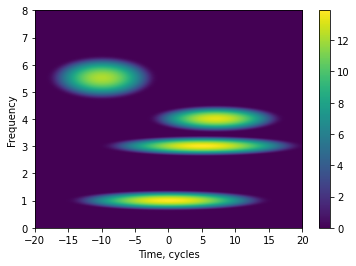

In [244]:
spectogram_image(y, edges=(0, 8))

In [245]:
print("There's a signal addition of the 4th wave packet with a frequency equal to 4 and time equal to 7")

There's a signal addition of the 4th wave packet with a frequency equal to 4 and time equal to 7


In [246]:
# Change the number of time steps in your signal to the power of 2 (i.e. 2**14) 
# and then slightly change the number of timesteps (i.e 2**14 +- 5).
# Measure the timing, can you explain the difference? 
# Write something as a possible explanation. 

In [162]:
for i in range(-5, 6):
    t=np.linspace(-20*2*pi, 20*2*pi, 2**10 + i)

    y = np.sin(t)*exp(-t**2/2/20**2)
    y = y + np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y = y + np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
    y = y + np.sin(4*t)*exp(-(t-7*2*pi)**2/2/10**2)
    
    print(f"shift: {i} from 2**10")
    %timeit -n 5 -r 7 get_specgram(y, t, window_width=2, nwindowsteps=1000)
    print("\n")

shift: -5 from 2**10
355 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: -4 from 2**10
213 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: -3 from 2**10
355 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: -2 from 2**10
265 ms ± 5.47 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: -1 from 2**10
228 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 0 from 2**10
197 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 1 from 2**10
233 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 2 from 2**10
215 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 3 from 2**10
274 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 4 from 2**10
394 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


shift: 5 from 2**10
211 ms ± 5.31 ms per loop (mean ± std. dev. of 7 runs, 5 loops each

We see a fall in time for shift equal to -4, -2, -1, 0, 2, 5. 